<a href="https://colab.research.google.com/github/stVan123/Deep-Learning-for-Tuberculosis-Prediction/blob/main/Preprocessing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **PREPROCCESSING DATA**

Stefanus Andika Putra | SKRIPSI

In [ ]:
!pip install SimpleITK==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44.9 MB 1.3 MB/s 


In [ ]:
#Library yang digunakan
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import os 
import zipfile 
import cv2 
import SimpleITK as sitk 

from PIL import Image 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path folder data
cxr = "/content/drive/MyDrive/SKRIPSI/DATA SKRIPSI"

cxr_data = sorted([
    os.path.join(os.getcwd(), cxr, x)
    for x in os.listdir(cxr)
])

print("Banyak data: ", len(cxr_data))

#Mengambil nama file dan dimasukkan dalam array

cxr_ids = []
for id in cxr_data:
  ids = id.split("/")[-1].split(".")[0]
  cxr_ids.append(ids)

print("\n",cxr_ids)

Banyak data:  247

 ['S1806024-4294884', 'S1806037-4295950', 'S1806042-4296129', 'S1806053-4307056', 'S1806058-4232052', 'S1806065-4296424', 'S1806076-3499184', 'S1806084-3379569', 'S1806086-4123017', 'S1807045-4291222', 'S1807046-4305984', 'S1807058-4297203', 'S1807063-4297332', 'S1807066-4160832', 'S1807096-4297494', 'S1807103-4297587', 'S1807108-4297635', 'S1807111-4310560', 'S1808007-4310367', 'S1808046-4298406', 'S1808051-4298495', 'S1808059-4322212', 'S1808063-4298642', 'S1808065-4298658', 'S1808077-3728570', 'S1808087-4328918', 'S1808088-4073441', 'S1808090-3000782', 'S1808095-2330761', 'S1809029-4299365', 'S1809031-4299385', 'S1809040-4299519', 'S1809044-4299536', 'S1809045-4299638', 'S1809051-4299695', 'S1809074-4299926', 'S1809084-4093474', 'S1810053-3775136', 'S1810069-4293606', 'S1810112-4088500', 'S1810124-4334023', 'S1810126-4301072', 'S1810128-4340250', 'S1810142-4301004', 'S1810153-4334949', 'S1811051-4301823', 'S1811054-4286780', 'S1811055-4301931', 'S1811057-4336847',

In [ ]:
print(cxr_ids[44])

S1810153-4334949


**Plot Visualisasi Image**

(3052, 2540)


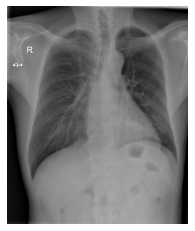

In [ ]:
# Fungsi untuk reading data DICOM dengan library simple ITK
def visualisasi(data):
    data = sitk.ReadImage(data)
    data = sitk.Cast(sitk.RescaleIntensity(data), sitk.sitkUInt8)
    data_array = sitk.GetArrayFromImage(data)
    data_img = data_array[0]
    return data_img

# Menambahkan data visualisasi dalam list
cxr_visualisasi = []

for n in zip(cxr_data):
  cxr = visualisasi(n)
  cxr_visualisasi.append(cxr)

# Plot visualisasi dengan library matplotlib
plt.imshow(cxr_visualisasi[4],cmap=plt.cm.Greys_r)
plt.axis("off")
# Melihat ukuran dimension Image
print(cxr_visualisasi[4].shape)


# **Mengubah `DICOM` menjadi `PNG`**

Melakukan resample Image menjadi 1024 x 1024

In [ ]:
# Fungsi resample image menjadi 1024 x 1024
def resample_images(itk_image, out_size=[1024, 1024], is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()

    out_spacing = [
        original_spacing[0] * (original_size[0] / out_size[0]),
        original_spacing[1] * (original_size[1] / out_size[1])
    ]

    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkBSpline)

    return resample.Execute(itk_image) 

In [ ]:
# cxr_visualisasi untuk list data
# cxr_ids         untuk list nama

for a,b in zip(cxr_visualisasi, cxr_ids):
  # melakukan resample image menjadi 1024 x 1024 pada setiap data
  imgs = resample_images(sitk.GetImageFromArray(a))
  lbl_array = sitk.GetArrayFromImage(imgs)
  # memakai library PIL untuk format dan save data dalam png
  im = Image.fromarray(lbl_array)
  im.save('/content/drive/MyDrive/SKRIPSI/DATA SKRIPSI_PNG/'+ b + '.png')

**PROCESSING DATA CSV**

# 14 Label Anomali

1. Infiltrat
2. Fibroinfiltrat
3. Konsolidasi
4. Kavitas
5. Efusi_Pleura
6. Fibrosis
7. Bronkiektasis
8. Penebalan_Pleura
9. Atelektasis
10. Limfadenopati
11. Pneumothoraks
12. Bullae
13. Tuberkuloma
14. Milier

# FILTERING LABEL DATA CSV

Melakukan filtering terhadap 14 label anomali pada deskripsi keterangan dokter pada data CSV

In [ ]:
# path csv file
path = '/content/drive/MyDrive/SKRIPSI/Data Filtering.csv'

# membaca csv file
df = pd.read_csv(path)

In [ ]:
df.head()

,Patient ID,BTA,Rad Reference
0,S1806024-4294884,TB (-),Teknik : Radiografi thorax dalam proyeksi AP.\...
1,S1806037-4295950,TB (-),Teknik : Radiografi thorax dalam proyeksi AP.\...
2,S1806042-4296129,TB (-),Teknik : Radiografi thorax dalam proyeksi AP.\...
3,S1806053-4307056,TB (-),Teknik : Radiografi thorax dalam proyeksi PA.\...
4,S1806058-4232052,TB (-),Teknik : Radiografi thorax dalam proyeksi PA.\...


MENGHAPUS SYMBOL DAN MENGUBAH DALAM LOWER CASE

In [ ]:
df["Rad Reference"] = df["Rad Reference"].str.replace(":","")
df["Rad Reference"] = df["Rad Reference"].str.replace(".","")
df["Rad Reference"] = df["Rad Reference"].str.replace("/","")
df["Rad Reference"] = df["Rad Reference"].str.replace(",","")
df["Rad Reference"] = df["Rad Reference"].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df.head()

,Patient ID,BTA,Rad Reference
0,S1806024-4294884,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...
1,S1806037-4295950,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...
2,S1806042-4296129,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...
3,S1806053-4307056,TB (-),teknik radiografi thorax dalam proyeksi pa\n\...
4,S1806058-4232052,TB (-),teknik radiografi thorax dalam proyeksi pa\n\...


In [ ]:
import nltk # menggunakan natural language toolkit untuk melakukan tokenisasi pada rows Rad Reference
nltk.download('punkt');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['token'] = df.apply(lambda row: nltk.word_tokenize(row['Rad Reference']), axis=1)

In [ ]:
df

,Patient ID,BTA,Rad Reference,token
0,S1806024-4294884,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ..."
1,S1806037-4295950,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ..."
2,S1806042-4296129,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ..."
3,S1806053-4307056,TB (-),teknik radiografi thorax dalam proyeksi pa\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ..."
4,S1806058-4232052,TB (-),teknik radiografi thorax dalam proyeksi pa\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ..."
...,...,...,...,...
56,S1812050-4334716,TB (-),teknik radiografi toraks dalam proyeksi pa\n\...,"[teknik, radiografi, toraks, dalam, proyeksi, ..."
57,S1812051-4338733,TB (-),teknik radiografi toraks dalam proyeksi pa\n\...,"[teknik, radiografi, toraks, dalam, proyeksi, ..."
58,S1812052-4359858,TB (-),teknik radiografi toraks dalam proyeksi pa\n\...,"[teknik, radiografi, toraks, dalam, proyeksi, ..."
59,S1812091-4371110,TB (-),teknik radiografi toraks dalam proyeksi pa\n\...,"[teknik, radiografi, toraks, dalam, proyeksi, ..."


In [ ]:
# fungsi untuk filtering
def Filter(list1, list2):
    return [n for n in list1 if
             any(m in n for m in list2)]

In [ ]:
data_token = len(df['token'])
n = 0

data_filtering = []

# fungsi while untuk melakukan looping filtering 14 anomali yang terdapat pada setiap deskripsi dokter dengan membandingkan keywords
while n < data_token:
  data_sebelum_filtering = df['token'].loc[n]
  keywords = ['infiltrat','fibroinfiltrat','konsolidasi','kavitas','efusi_Pleura','fibrosis','bronkiektasis', 'penebalan_pleura','atelektasis','limfadenopati','pneumothoraks','bullae','tuberkuloma','milier']
  filter = Filter(data_sebelum_filtering, keywords)
  new_filter = sorted(set(filter), key=lambda x:filter.index(x)) # untuk menghapus duplicate label 
  data_filtering.append(new_filter)
  print(n,new_filter)
  n += 1

0 ['infiltrat']
1 ['infiltrat']
2 ['kavitas', 'konsolidasi', 'fibroinfiltrat', 'atelektasis', 'bronkiektasis']
3 ['fibroinfiltrat', 'tuberkuloma']
4 ['fibroinfiltrat', 'bronkiektasis']
5 ['fibroinfiltrat']
6 ['infiltrat']
7 ['infiltrat', 'konsolidasi', 'bronkiektasis']
8 ['konsolidasi', 'infiltrat', 'fibrosis', 'tuberkuloma']
9 ['infiltrat']
10 ['fibroinfiltrat', 'infiltrat', 'atelektasis']
11 ['fibroinfiltrat', 'konsolidasi', 'kavitas']
12 ['infiltrat']
13 ['infiltrat', 'fibrosis']
14 ['fibroinfiltrat', 'infiltrat']
15 ['infiltrat', 'kavitas']
16 ['kavitas', 'infiltrat']
17 ['fibroinfiltrat']
18 ['fibroinfiltrat']
19 ['bullae', 'fibroinfiltrat']
20 ['fibroinfiltrat', 'limfadenopati']
21 ['fibroinfiltrat', 'infiltrat']
22 ['fibroinfiltrat', 'kavitas', 'konsolidasi']
23 ['fibrosis', 'infiltrat']
24 ['kavitas', 'infiltrat']
25 ['fibroinfiltrat']
26 ['fibroinfiltrat']
27 ['infiltrat', 'fibrosis']
28 ['fibroinfiltrat']
29 ['infiltrat', 'milier']
30 ['fibroinfiltrat', 'infiltrat']
31 ['infi

In [ ]:
print(data_filtering)

[['infiltrat'], ['infiltrat'], ['kavitas', 'konsolidasi', 'fibroinfiltrat', 'atelektasis', 'bronkiektasis'], ['fibroinfiltrat', 'tuberkuloma'], ['fibroinfiltrat', 'bronkiektasis'], ['fibroinfiltrat'], ['infiltrat'], ['infiltrat', 'konsolidasi', 'bronkiektasis'], ['konsolidasi', 'infiltrat', 'fibrosis', 'tuberkuloma'], ['infiltrat'], ['fibroinfiltrat', 'infiltrat', 'atelektasis'], ['fibroinfiltrat', 'konsolidasi', 'kavitas'], ['infiltrat'], ['infiltrat', 'fibrosis'], ['fibroinfiltrat', 'infiltrat'], ['infiltrat', 'kavitas'], ['kavitas', 'infiltrat'], ['fibroinfiltrat'], ['fibroinfiltrat'], ['bullae', 'fibroinfiltrat'], ['fibroinfiltrat', 'limfadenopati'], ['fibroinfiltrat', 'infiltrat'], ['fibroinfiltrat', 'kavitas', 'konsolidasi'], ['fibrosis', 'infiltrat'], ['kavitas', 'infiltrat'], ['fibroinfiltrat'], ['fibroinfiltrat'], ['infiltrat', 'fibrosis'], ['fibroinfiltrat'], ['infiltrat', 'milier'], ['fibroinfiltrat', 'infiltrat'], ['infiltrat', 'milier'], ['infiltrat'], ['infiltrat'], ['inf

In [ ]:
df['Label Filtering'] = data_filtering

In [ ]:
df.head()

,Patient ID,BTA,Rad Reference,token,Label Filtering
0,S1806024-4294884,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ...",[infiltrat]
1,S1806037-4295950,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ...",[infiltrat]
2,S1806042-4296129,TB (-),teknik radiografi thorax dalam proyeksi ap\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ...","[kavitas, konsolidasi, fibroinfiltrat, atelekt..."
3,S1806053-4307056,TB (-),teknik radiografi thorax dalam proyeksi pa\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ...","[fibroinfiltrat, tuberkuloma]"
4,S1806058-4232052,TB (-),teknik radiografi thorax dalam proyeksi pa\n\...,"[teknik, radiografi, thorax, dalam, proyeksi, ...","[fibroinfiltrat, bronkiektasis]"


In [ ]:
df.to_csv('/content/drive/MyDrive/SKRIPSI/data_hasil_filtering.csv')